<a href="https://colab.research.google.com/github/iatecola/MeuProjeto/blob/main/Meuprojeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
#Upload do arquivo
from google.colab import files
arq = files.upload()

In [55]:
#Criando nosso DataFrame
df = pd.read_excel("/content/Salvador.xlsx")

In [64]:
#Visualizando as 5 primeiras linhas
df

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3
...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1


In [57]:
#Quantidade de linhas e colunas
df.shape

(240, 5)

In [58]:
#Verificando os tipos de dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [63]:
#Qual a Receita total?
df["Cidade"].count()

240

In [70]:
#Qual a receita Total?
df["Receita"] = df["Vendas"].mul(df["Qtde"]) #Criando a coluna receita

In [93]:
df.head(1)

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita
0,Salvador,2018-01-01,31.06,1037,3,93.18,93.18


In [94]:
#Qual a Receita Total?
round(df["Receita"].sum(), 2)

40596.73

In [95]:
df.head(1)

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita
0,Salvador,2018-01-01,31.06,1037,3,93.18,93.18


**Agora, queremos deletar a coluna receita**

In [117]:
df.drop(columns = "receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Salvador,2018-01-01,31.06,1037,3,93.18
1,Salvador,2018-01-01,19.02,1034,3,57.06
2,Salvador,2019-02-10,173.59,1035,3,520.77
3,Salvador,2019-02-10,176.34,1037,3,529.02
4,Salvador,2019-02-14,19.47,1037,3,58.41
...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84
236,Salvador,2019-01-03,126.29,1035,3,378.87
237,Salvador,2019-01-03,38.06,1036,3,114.18
238,Salvador,2019-01-03,139.64,1035,1,139.64


In [118]:
#Verificando o tipo da coluna receita
df["Receita"].dtype

dtype('float64')

 **Missing Values**

In [119]:
#Verificando se temos dados faltantes
df.isnull().sum()

Cidade     0
Data       0
Vendas     0
LojaID     0
Qtde       0
receita    0
Receita    0
dtype: int64

**E, se a gente quiser saber o Lucro por Ano e Por Marca?**

In [120]:
#Vamos Agrupar por ano e receita
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018                 150.24
2019              40,446.49
Name: Receita, dtype: float64

In [103]:
 pd.options.display.float_format = '{:20,.2f}'.format

In [121]:
#Qual o total de produtos vendidos por cidade?
df.groupby("Cidade")["Qtde"].sum().sort_values(ascending=False)

Cidade
Salvador    476
Name: Qtde, dtype: int64

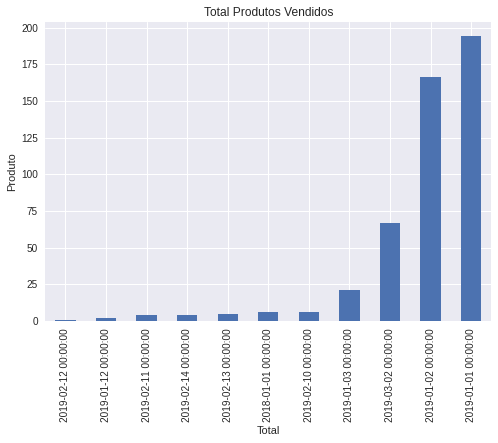

In [108]:
#Gráfico Total de produtos vendidos por data
df.groupby("Data")["Qtde"].sum().sort_values(ascending=True).plot.bar(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

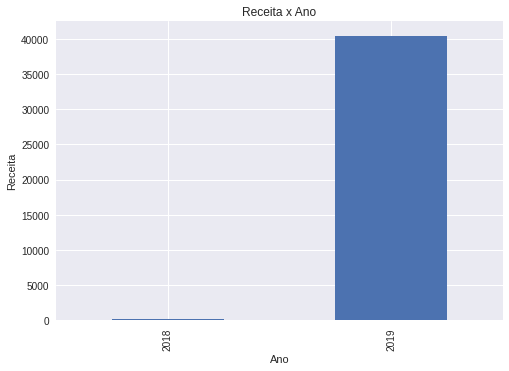

In [122]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.bar(title="Receita x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [123]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Data"].dt.year == 2019]

In [124]:
df_2019.head()

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita
2,Salvador,2019-02-10,173.59,1035,3,520.77,520.77
3,Salvador,2019-02-10,176.34,1037,3,529.02,529.02
4,Salvador,2019-02-14,19.47,1037,3,58.41,58.41
5,Salvador,2019-01-01,179.20,1037,3,537.60,537.60
6,Salvador,2019-01-01,36.30,1034,2,72.60,72.60


In [125]:
df["Receita"].describe()

count                 240.00
mean                  169.15
std                   171.51
min                     4.57
25%                    36.57
50%                   114.03
75%                   245.37
max                   721.83
Name: Receita, dtype: float64

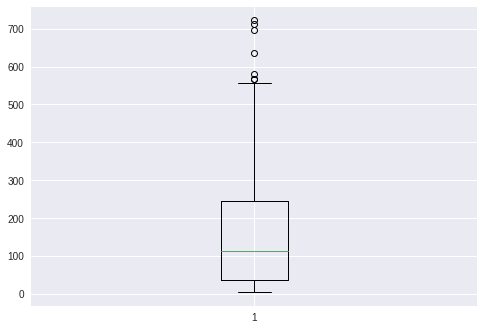

In [126]:
#Gráfico de Boxplot
plt.boxplot(df["Receita"]);

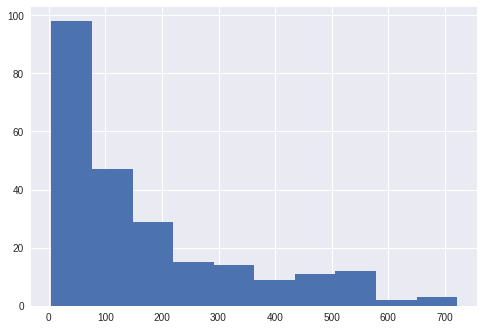

In [127]:
#Histograma
plt.hist(df["Receita"]);

In [129]:
#Mínimo da receita
df["Receita"].min()

4.57

In [130]:
#Máximo da receita
df['Receita'].max()

721.83

In [131]:
#Identificando o Outlier
df[df["Receita"] == 20]

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita


In [132]:
df.to_csv("df_vendas_Salvador", index=False)

***Salvando o projeto em vendas Salvador***